# Imports

In [86]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Load the Data

In [2]:
shipping_data = pd.read_csv("C:/Users/keshi/Downloads/archive (1)/Output_file/Shipping_cleaned_data.csv")

In [3]:
shipping_data.head()

,Unnamed: 0,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
shipping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           10999 non-null  int64 
 1   ID                   10999 non-null  int64 
 2   Warehouse_block      10999 non-null  object
 3   Mode_of_Shipment     10999 non-null  object
 4   Customer_care_calls  10999 non-null  int64 
 5   Customer_rating      10999 non-null  int64 
 6   Cost_of_the_Product  10999 non-null  int64 
 7   Prior_purchases      10999 non-null  int64 
 8   Product_importance   10999 non-null  object
 9   Gender               10999 non-null  object
 10  Discount_offered     10999 non-null  int64 
 11  Weight_in_gms        10999 non-null  int64 
 12  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [5]:
shipping_data.drop(shipping_data.columns[shipping_data.columns.str.contains('unnamed',case = False)],axis = 1,
                   inplace = True)

In [6]:
shipping_data.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1


In [7]:
shipping_data.set_index('ID', inplace=True)

In [8]:
shipping_data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


C:\Users\keshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\keshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\keshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\keshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

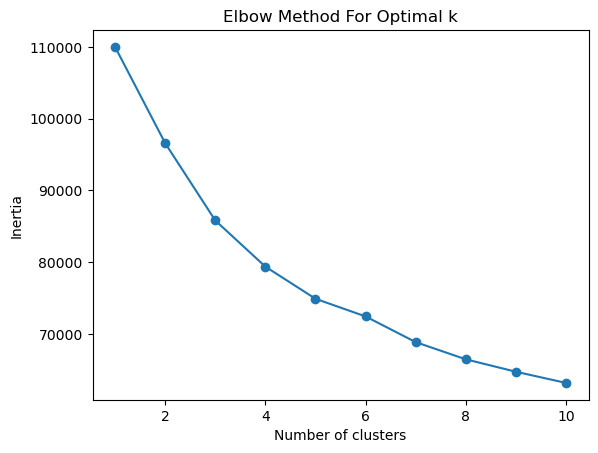

In [115]:
# Selecting numerical columns for clustering
numerical_features = shipping_data.select_dtypes(include=['int64', 'float64']).drop(['Reached.on.Time_Y.N'], axis=1)

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Using PCA for dimensionality reduction to visualize in 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Determining the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


C:\Users\keshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


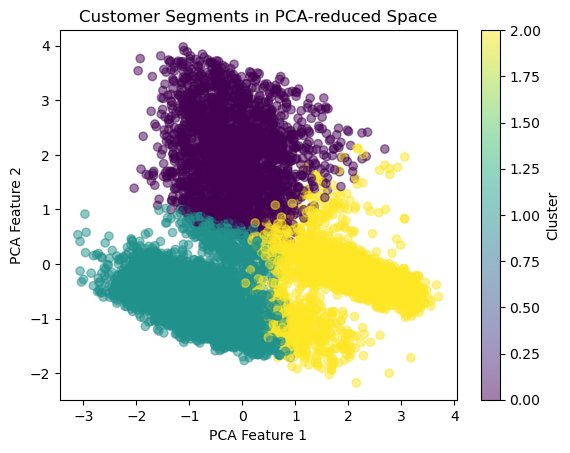

In [114]:
# Choosing an appropriate number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding cluster information to the original dataframe
shipping_data['Cluster'] = clusters

# Visualizing clusters in the PCA-reduced space
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Customer Segments in PCA-reduced Space')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.show()

         Average On-time Delivery Rate  Count
Cluster                                      
0                             0.994771   2295
1                             0.480013   6079
2                             0.518857   2625


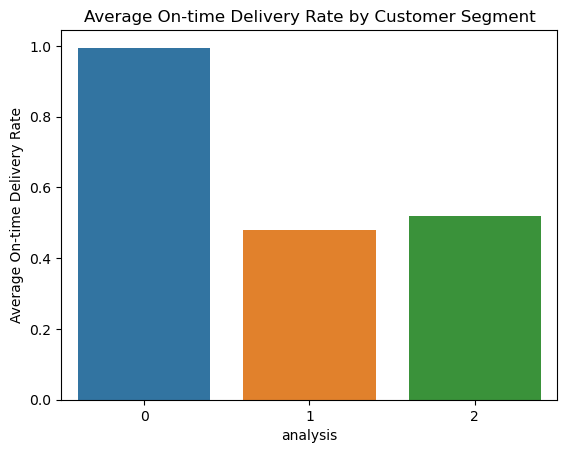

In [113]:
# Analyzing delivery performance for each segment
analysis = shipping_data.groupby('Cluster')['Reached.on.Time_Y.N'].agg(['mean', 'count'])
analysis.columns = ['Average On-time Delivery Rate', 'Count']
print(segment_analysis)

# Visualizing the delivery performance by cluster
sns.barplot(x=analysis.index, y=segment_analysis['Average On-time Delivery Rate'])
plt.title('Average On-time Delivery Rate by Customer Segment')
plt.xlabel('analysis')
plt.ylabel('Average On-time Delivery Rate')
plt.show()

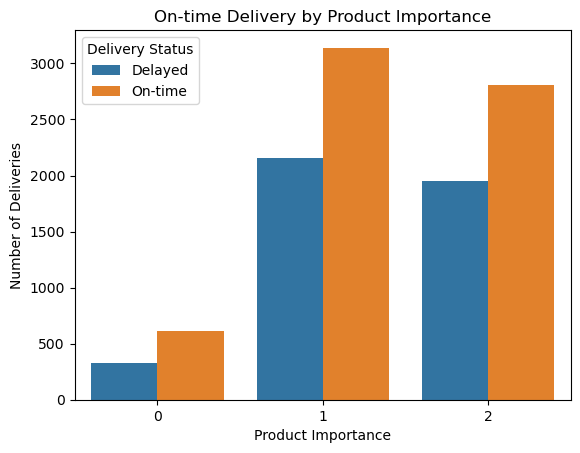

In [112]:
# analysing the impact of delievery based on product importance

sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=shipping_data)
plt.title('On-time Delivery by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()

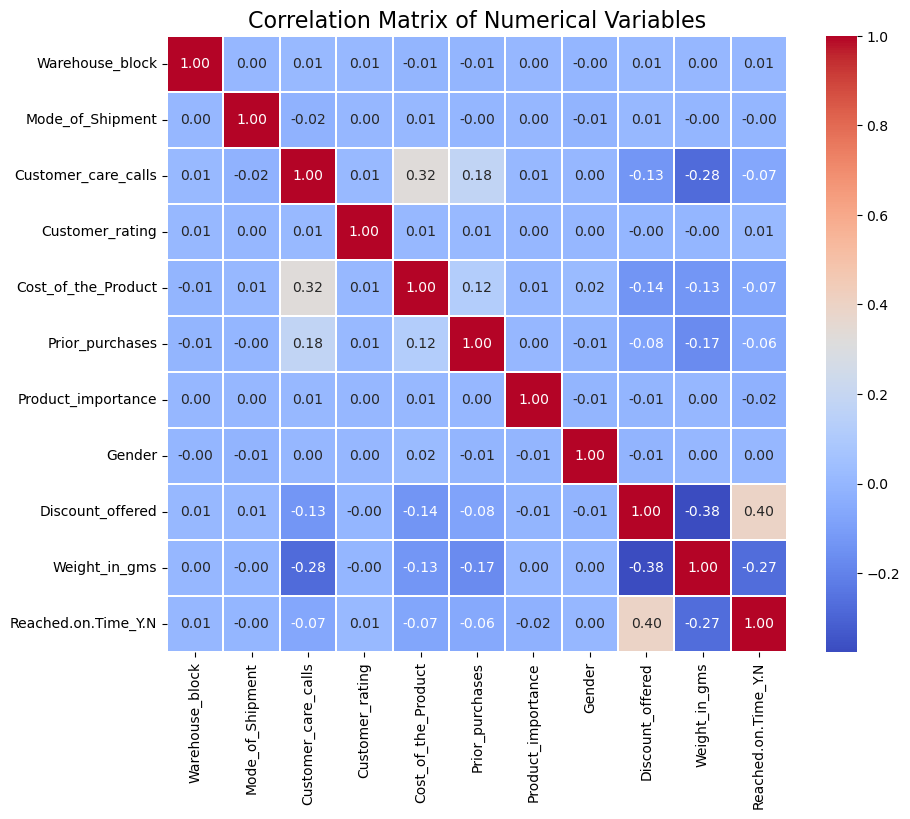

In [118]:
# analyzing relationship between numeric numbers using heatmap
numerical_data = shipping_data.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

We can conclude that there is a postive relationship between the discount_offered and reached on time products.

# Label Encoding

In [110]:
label_encoders = {}
for column in ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']:
    lE = LabelEncoder()
    shipping_data[column] = lE.fit_transform(shipping_data[column])
    label_encoders[column] = lE

In [111]:
shipping_data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cluster
ID,,,,,,,,,,,,
1,3,0,4,2,177,3,1,0,44,1233,1,0
2,4,0,4,5,216,2,1,1,59,3088,1,0
3,0,0,2,2,183,4,1,1,48,3374,1,0
4,1,0,3,3,176,4,2,1,10,1177,1,0
5,2,0,2,2,184,3,2,0,46,2484,1,0


In [120]:
shipping_data.to_csv("C:/Users/keshi/Downloads/archive (1)/Output_file1/EDA.csv")